<a href="https://colab.research.google.com/github/Stonary-hzq/InteriorStyleHunter/blob/main/DataProcessor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install validators

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
module_dir = (
    "/content/drive/My Drive/AI project/filtering data/"
)
import sys
sys.path.append(module_dir)
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/My Drive/AI project/filtering data/']

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import pickle
from tqdm import tqdm
import os
import cv2
#import validators
import matplotlib.pyplot as plt
from PIL import ImageFile
import random
from IPython.display import clear_output

# Download and save imgs

In [ ]:
print(data_path)

/content/drive/My Drive/AI project/filtering data/UK filter.csv


In [ ]:
data_path = os.path.join(module_dir, "UK filter.csv")
data = pd.read_csv(data_path)

#data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

#Airbnb_data = data[data.price > 10]
#Airbnb_data = Airbnb_data[Airbnb_data.reviews_per_month > .12]

Airbnb_data = data.sample(frac=1)

In [ ]:
print(data['picture_url'].size)

41633


In [ ]:
print(Airbnb_data.size)

13392


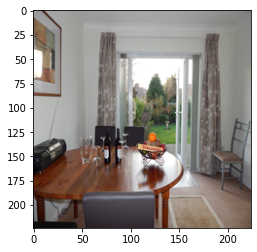

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

IMAGE_SIZE = [224,224]

response = requests.get(Airbnb_data['picture_url'][1477])
img = Image.open(BytesIO(response.content)).resize(IMAGE_SIZE)
plt.imshow(img)

In [ ]:
print(Airbnb_data.size)

17856


In [ ]:
def download_img(batch_size, path):
  #img_list = []
  #price_list = []
  #data_dict=()
  for i in tqdm(range(batch_size)):
    try:
      link = Airbnb_data['picture_url'][i+1476]
      if validators.url(link):
        response = requests.get(link)
        img = Image.open(BytesIO(response.content)).resize([224,224])
      
        img_np = np.array(img) / 255.0 # makes imputs [0,1]
        if img_np.shape == (224, 224, 3):        
          #img_list.append(img_np)
          img.save(os.path.join(save_path, str(i+1476)+".jpg"))
          #price_list.append(Airbnb_data.price[i])
      else:
        print("invalid URL")
    except (KeyError or OSError):
      pass
  return 1

In [ ]:
# save image in drive
save_path = os.path.join(module_dir, "London images/")
x = download_img(5000-1575,save_path)


100%|██████████| 3425/3425 [40:27<00:00,  1.41it/s]


# label train image

In [ ]:
x = input('Enter your name:')
print('Hello, ' + x)

Enter your name:f
Hello, f


In [ ]:
save_path = os.path.join(module_dir, "London images/")

In [ ]:
os.path.exists(save_path+str(0)+".jpg")

True

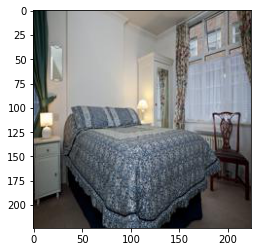

0:skip 1:romantic 2:morden 3:traditional 4:natural 5:country 6:minimalist 7:industrial
5


In [ ]:
i=0
labels=[]
img_list=[]
im = Image.open(save_path + str(i)+".jpg")
plt.imshow(im)
plt.show(block=False)
plt.pause(0.1)
print("0:skip 1:romantic 2:morden 3:traditional 4:natural 5:country 6:minimalist 7:industrial")
inp = input()
labels.append(int(inp))
img_list.append(str(i)+".jpg")
#clear_output(wait=True)
df_label = {'Image':img_list, 'Label':labels}
df = pd.DataFrame(df_label)
df.to_csv(save_path+'labels.csv')

In [ ]:
def create_labels(start, batch_size, path):

    labels = []
    path = path + '/'
    val_for = ['jpg', 'jpeg', 'png']
    img_list = []
    #img_list = os.listdir('images')
    #img_list = [i for i in img_list if i.split('.')[-1] in val_for]
    
    for i in range(batch_size):
        print(i,"/", batch_size)
        if os.path.exists(path+str(i+start)+".jpg"):
          im = Image.open(path + str(i+start)+".jpg")
          plt.imshow(im)
          plt.show(block=False)
          plt.pause(0.1)
          print("0:skip 1:romantic 2:morden 3:traditional 4:natural 5:country 6:minimalist 7:industrial")
          inp = int(input())
          if inp == '0':
            print("skip")
          elif inp<8 and inp>0:
            labels.append(int(inp))
            img_list.append(str(i+start)+".jpg")
          clear_output(wait=True)
        else:
          print("invalid path")
    data = {'Image':img_list, 'Label':labels}
    df = pd.DataFrame(data)
    df.to_csv(save_path+'labels.csv', mode='a', header=False) 
    
    print('\nlabels.csv saved!')
    return (df)

Caution!!!!! process: 895/5000

In [ ]:
labels = create_labels(1700, 10, save_path)


labels.csv saved!


# Label test img

In [ ]:
random.sample(range(500, 1001), 3)

[515, 708, 931]

In [ ]:
def test_labels(path):

    labels = []
    path = path + 'image/'
    val_for = ['jpg', 'jpeg', 'png']
    img_list = []
    n=0
    #img_list = os.listdir('images')
    #img_list = [i for i in img_list if i.split('.')[-1] in val_for]
    img_nums = random.sample(range(500, 1001), 200)
    for i in img_nums:
        print(n,"/", 100)
        if n <=100:
          if os.path.exists(path+str(i)+".jpg"):
            im = Image.open(path + str(i)+".jpg")
            plt.imshow(im)
            plt.show(block=False)
            plt.pause(0.1)
            print("0:skip 1:romantic 2:morden 3:traditional 4:natural 5:country 6:minimalist 7:industrial")
            inp = int(input())
            if inp == '0':
              print("skip")
            elif inp<8 and inp>0:
              labels.append(int(inp))
              img_list.append(str(i)+".jpg")
              n = n+1
            clear_output(wait=True)
          else:
            print("invalid path")
        else:
          print("finished 100")
          break
        
    data = {'Image':img_list, 'Label':labels}
    df = pd.DataFrame(data)
    df.to_csv(path+'last 500.csv') 
    
    print('\nlabels.csv saved!')
    return (df)

In [ ]:
test_path = os.path.join(module_dir, "Test_dataset_painting/")

In [ ]:
os.path.exists(test_path+"image/0.jpg")

True

In [ ]:
test_labels = test_labels(test_path)

101 / 100
finished 100

labels.csv saved!


# overview of dataset

In [ ]:
labeled_df = pd.read_csv(save_path+'labels.csv')

In [ ]:
labeled_df = labeled_df.drop(columns=['Unnamed: 0'])

In [ ]:
print(labeled_df.head())

   Image  Label
0  0.jpg      5
1  1.jpg      2
2  2.jpg      5
3  3.jpg      6
4  6.jpg      1


In [ ]:
print(labeled_df['Label'].value_counts())

1    228
5    217
6    186
4    142
2    134
3     48
7     45
Name: Label, dtype: int64


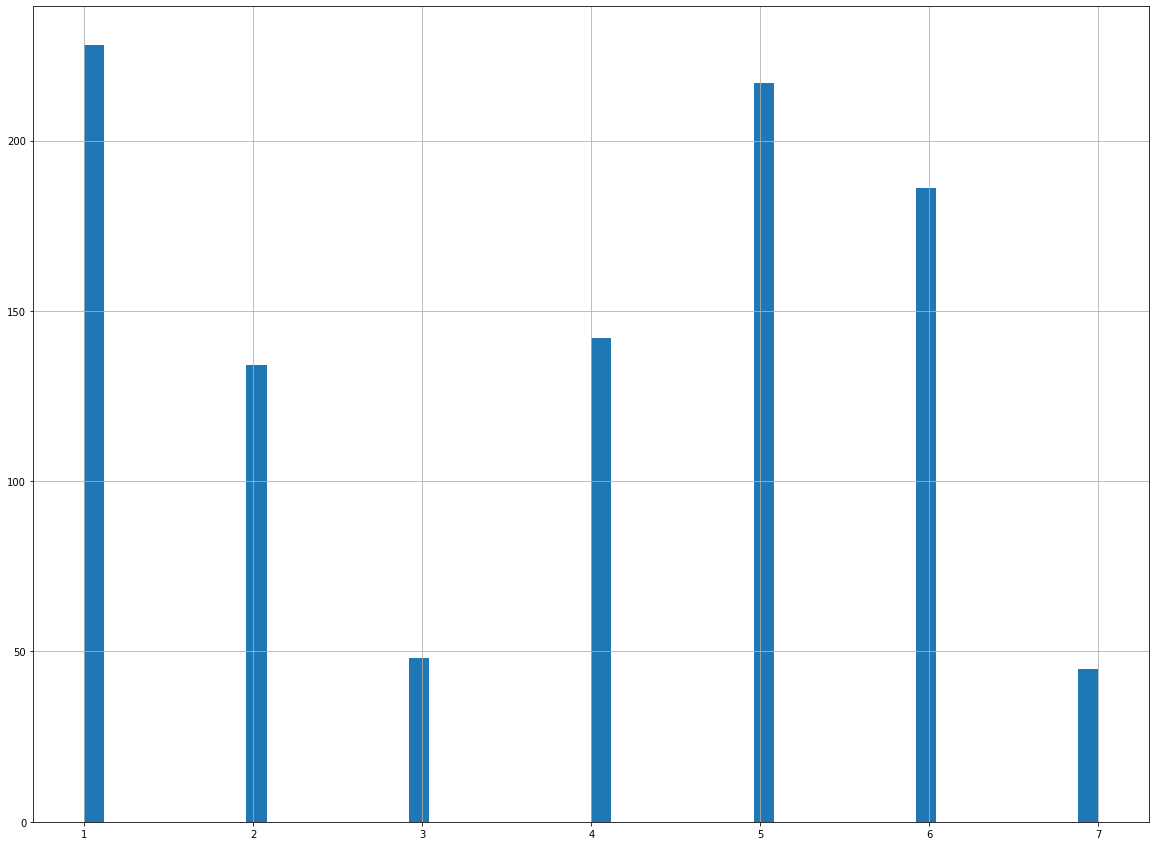

In [ ]:
%matplotlib inline
#import matplotlib.pyplot as plt
labeled_df['Label'].hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
test_df = pd.read_csv(test_path+'last 500.csv')

In [ ]:
print(test_df.head())

     Image  Label
0  754.jpg      1
1  955.jpg      3
2  945.jpg      1
3  532.jpg      6
4  516.jpg      4


In [ ]:
test_df = test_df.drop(columns=['Unnamed: 0'])

In [ ]:
print(test_df['Label'].value_counts())

1    31
5    22
4    21
3     9
6     8
2     8
7     2
Name: Label, dtype: int64


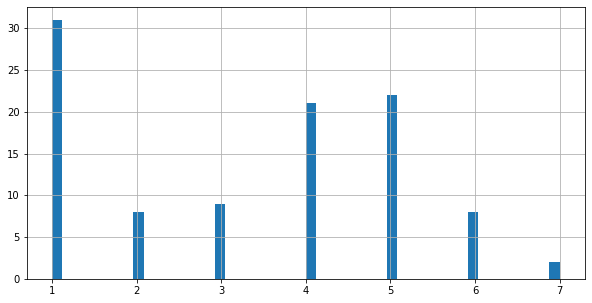

In [ ]:
test_df['Label'].hist(bins=50, figsize=(10,5))
plt.show()

# Pixel Shuffle

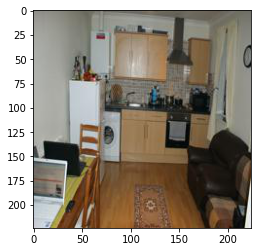

In [ ]:
im = Image.open(module_dir+"London images/521.jpg", "r")
plt.imshow(im)

In [ ]:
print(im)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA510C36790>


Done!


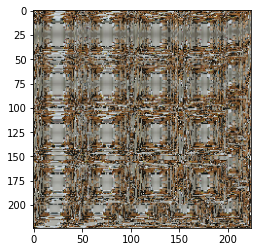

In [ ]:
from PIL import Image
import math

im = Image.open(module_dir+"London images/521.jpg", "r")
arr = im.load() #pixel data stored in this 2D array

def rot(A, n, x1, y1): #this is the function which rotates a given block
    temple = []
    for i in range(n):
        #temple.append([])
        for j in range(n):
            temple.append(arr[x1+i, y1+j])
    for i in range(n):
        for j in range(n):
            arr[x1+i,y1+j] = temple[n-1-i][n-1-j]


xres = 224
yres = 224
BLKSZ = 50 #blocksize
for i in range(2, BLKSZ+1):
    for j in range(int(math.floor(float(xres)/float(i)))):
        for k in range(int(math.floor(float(yres)/float(i)))):
            rot(arr, i, j*i, k*i)
'''for i in range(3, BLKSZ+1):
    for j in range(int(math.floor(float(xres)/float(BLKSZ+2-i)))):
        for k in range(int(math.floor(float(yres)/float(BLKSZ+2-i)))):
            rot(arr, BLKSZ+2-i, j*(BLKSZ+2-i), k*(BLKSZ+2-i))'''

plt.imshow(im)

print("Done!")